In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [6]:
#corr and scatter polot
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


Text(0, 0.5, 'Height')

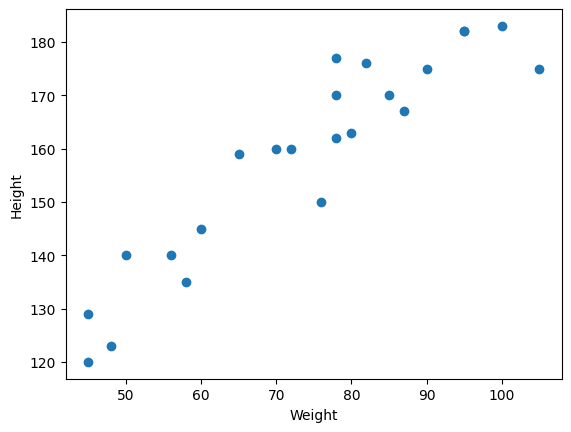

In [7]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

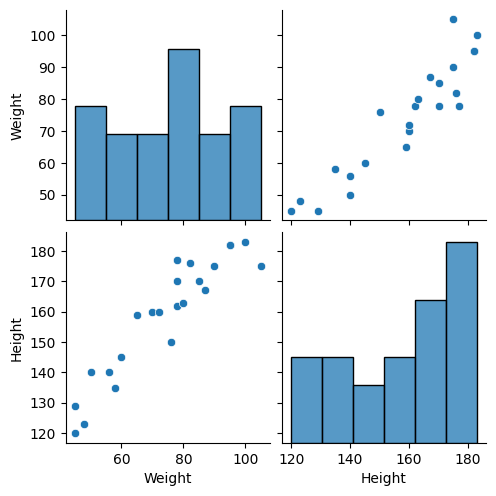

In [8]:
#searbord also
import seaborn as sns
sns.pairplot(df)

<Axes: >

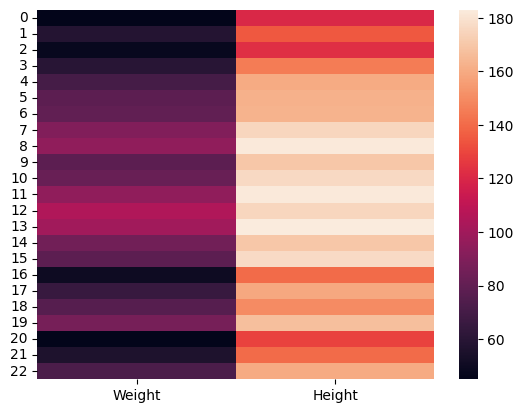

In [9]:
sns.heatmap(df)

## Independent and dependent features 
### The independent features should be data frame or 2d array because you train model on that only 
### Whereas the dependent feature can be series or 1d array
### A good naming convention is X for independent and y for dependent

In [10]:
X = df[['Weight']] #df 
y = df['Height']

In [11]:
#train test split

from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

## Standardisation  
### we will be applying z score to independent features for standardisation

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()


In [15]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [19]:
#apply simple linear regression now 
from sklearn.linear_model import LinearRegression


In [21]:
regression = LinearRegression(n_jobs=-1) #this -1 enables all cores of m cpu to be utilised

In [22]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [23]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


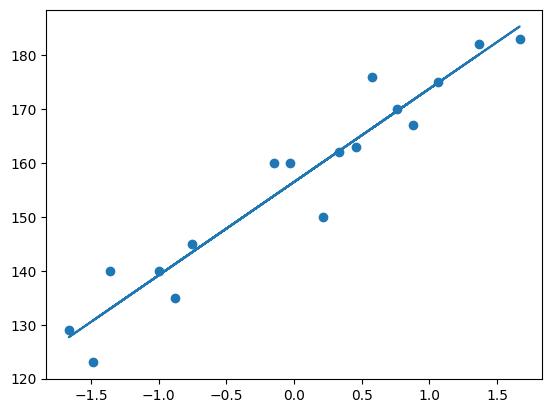

In [25]:
#plot
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [26]:
#prediction of data
y_pred = regression.predict(X_test)

In [27]:
#Performance metrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)



114.84069295228699
9.66512588679501
10.716374991212605


In [32]:
from sklearn.metrics import r2_score

score= r2_score(y_test,y_pred)

In [33]:
score

0.7360826717981276

## Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [34]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [38]:
!pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 634.7 kB/s  0:00:15m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


In [39]:
	
## OLS Linear Regression
import statsmodels.api as sm

In [40]:
model=sm.OLS(y_train,X_train).fit()


In [41]:

prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [42]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 05 Feb 2026   Prob (F-statistic):                       0.664
Time:                        15:17:43   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/envs/dsml/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


### WE observe tgat OLS method also gave us similar coeff

## Now we do prediction for new value 

### But we have to make sure tperform scaler transform otherwiseresult willbe bad

In [43]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

/opt/anaconda3/envs/dsml/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])